# Tunisian Property price prediction

### Import Librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

### Importing Data

In [2]:
df = pd.read_csv('Property Prices in Tunisia.csv')

## EDA : Exploratory data analysis

In [3]:
#See the first rows of the data
df.head()

,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449


In [4]:
#Data shape
df.shape

(12748, 9)

In [5]:
#Statistical description
df.describe()

,room_count,bathroom_count,size,price,log_price
count,12748.000000,12748.000000,12748.000000,1.274800e+04,12748.000000
mean,1.759649,0.759884,130.896219,1.601575e+07,4.374245
std,2.171468,1.264812,184.074990,1.016644e+09,1.389788
min,-1.000000,-1.000000,-1.000000,1.000000e+01,1.000000
25%,-1.000000,-1.000000,-1.000000,8.500000e+02,2.929419
50%,2.000000,1.000000,95.000000,8.975000e+04,4.953033
75%,3.000000,1.000000,150.000000,2.600000e+05,5.414973
max,20.000000,10.000000,2000.000000,1.000000e+11,11.000000


In [6]:
#Null Values
df.isnull().sum()

category          0
room_count        0
bathroom_count    0
size              0
type              0
price             0
city              0
region            0
log_price         0
dtype: int64

In [7]:
#See -1 values
(df==-1).sum()

category             0
room_count        3415
bathroom_count    3415
size              3415
type                 0
price                0
city                 0
region               0
log_price            0
dtype: int64

We can see that :
* The presence of -1 as a value which are infact NULL values
* The number of -1 values is equal in 3 columns
* The presence of outliers in the data 
* The 'price' varies from 100 to 10e+11, and we can explain it using the fact that our data contains propoerties that are for 'Rent' (À Louer) and for 'Sale' (À Vendre) in the 'type' column

## Data Visualisation 

To get the best visualizations, we will replace all -1 values with Null (nan), and we willm drop duplicate rows

In [8]:
#Replace -1 with nan
df = df.replace(-1,np.float('nan'))

C:\Users\ayedi\AppData\Local\Temp\ipykernel_5152\2077314769.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df = df.replace(-1,np.float('nan'))


In [9]:
#Drop duplicate rows
df.drop_duplicates(keep = False, inplace = True) 

#### **'type' column**

In [10]:
#Start with the 'type' column
print(df.type.value_counts())

À Vendre    5805
À Louer     4264
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

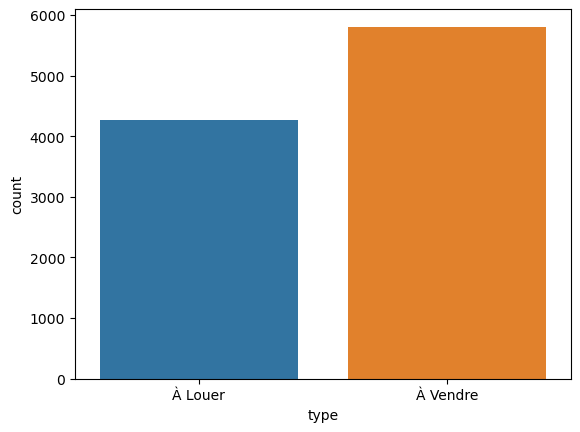

In [11]:
sns.countplot(data = df, x = 'type')

#### 'category' column

In [12]:
#category column
print(df.category.nunique())
print(df.category.unique())

7
['Appartements' 'Locations de vacances'
 'Magasins, Commerces et Locaux industriels' 'Maisons et Villas'
 'Terrains et Fermes' 'Colocations' 'Bureaux et Plateaux']


<AxesSubplot:xlabel='category', ylabel='count'>

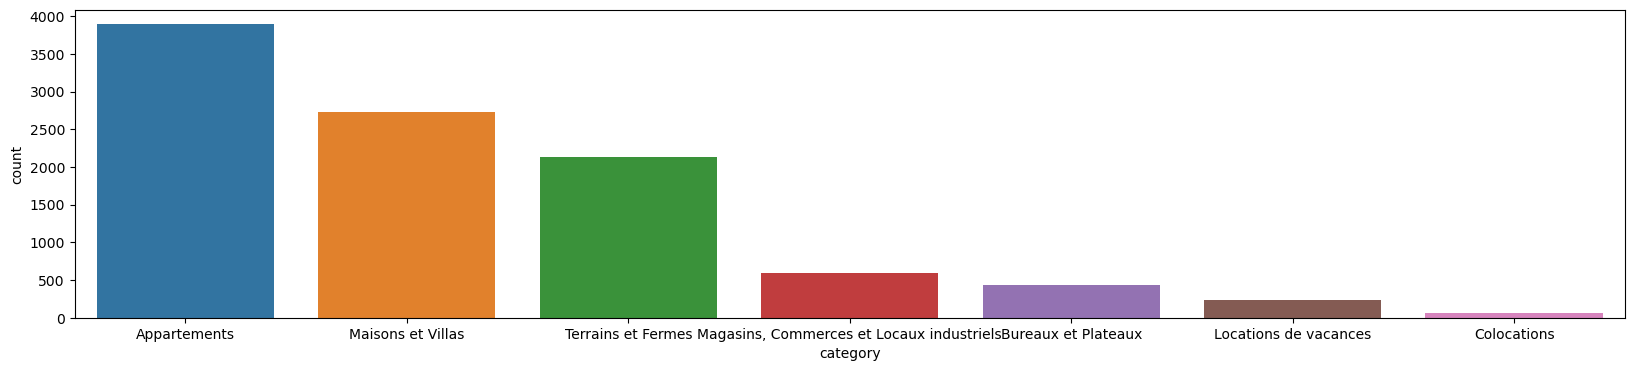

In [13]:
#A quick barplot
plt.figure(figsize=(20, 4))
sns.countplot(data = df, x = 'category', order=df.category.value_counts().index)

#### 'city' column

In [14]:
print(df.city.nunique())
print(df.city.unique())

24
['Ariana' 'Béja' 'Ben arous' 'Bizerte' 'Gabès' 'Gafsa' 'Jendouba'
 'Kairouan' 'Kasserine' 'Kébili' 'La manouba' 'Le kef' 'Mahdia' 'Médenine'
 'Monastir' 'Sidi bouzid' 'Siliana' 'Sousse' 'Tataouine' 'Tozeur'
 'Zaghouan' 'Sfax' 'Nabeul' 'Tunis']


<AxesSubplot:xlabel='count', ylabel='city'>

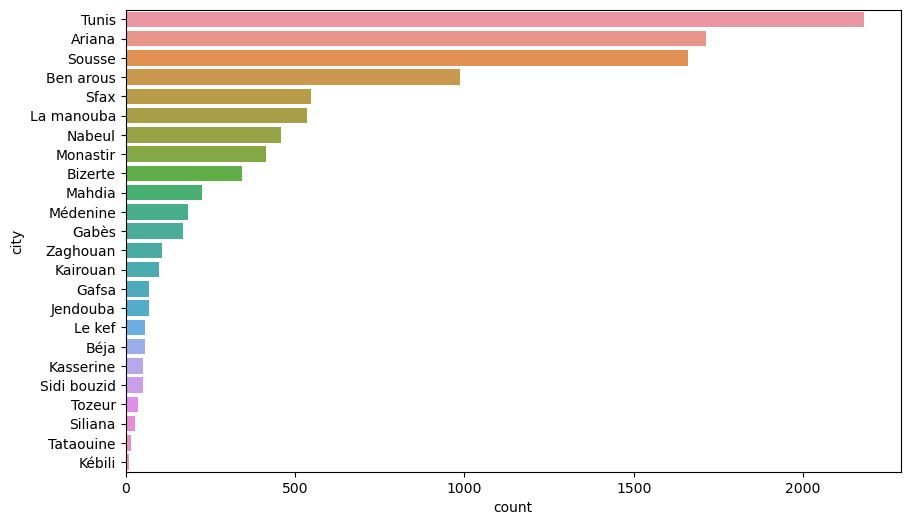

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data = df, y = 'city', order = df.city.value_counts().index)

#### 'region' have  high cardinality: 257 distinct values

#### 'room_count' column

In [16]:
print(df.room_count.nunique())
print(df.room_count.unique())

18
[ 2.  1.  4.  5.  3. nan  6.  7. 11. 12. 10.  9.  8. 18. 14. 13. 20. 15.
 16.]


<AxesSubplot:xlabel='room_count', ylabel='count'>

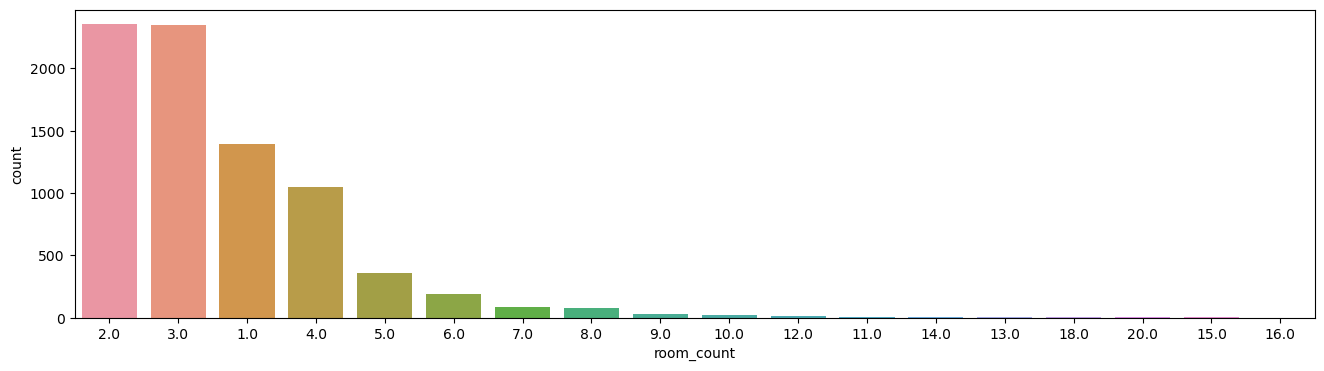

In [17]:
plt.figure(figsize=(16, 4))
sns.countplot(data = df, x = 'room_count', order = df.room_count.value_counts().index)

'bathroom_count' column

In [18]:
print(df.bathroom_count.nunique())
print(df.bathroom_count.unique())

10
[ 1.  2.  3. nan  4.  0.  5.  8.  6. 10.  7.]


<AxesSubplot:xlabel='bathroom_count', ylabel='count'>

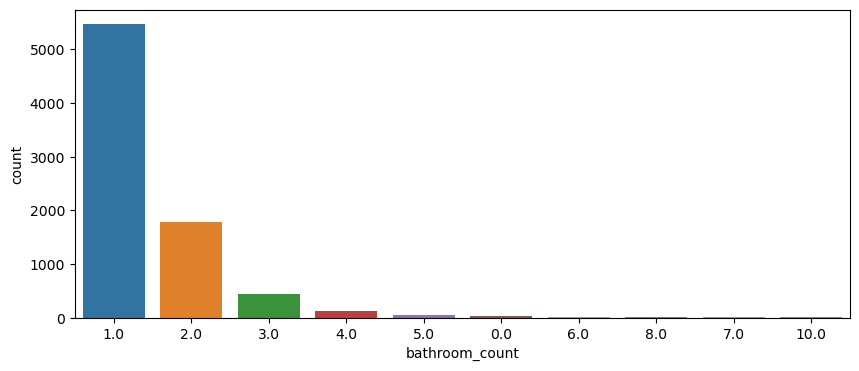

In [19]:
plt.figure(figsize=(10, 4))
sns.countplot(data = df, x = 'bathroom_count', order = df.bathroom_count.value_counts().index)

'size' column

C:\Users\ayedi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='size', ylabel='Density'>

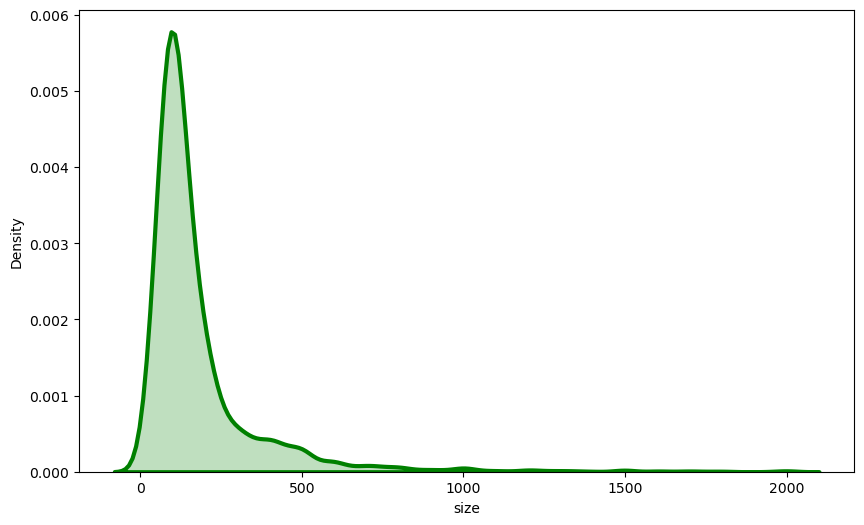

In [20]:
#Use a density plot
plt.figure(figsize=(10, 6))
sns.distplot(df['size'], hist=False, kde=True, 
              color = 'green',
             kde_kws={'linewidth': 3,'shade': True,})

we will use scatter plot to detect outliers 

<AxesSubplot:xlabel='size', ylabel='price'>

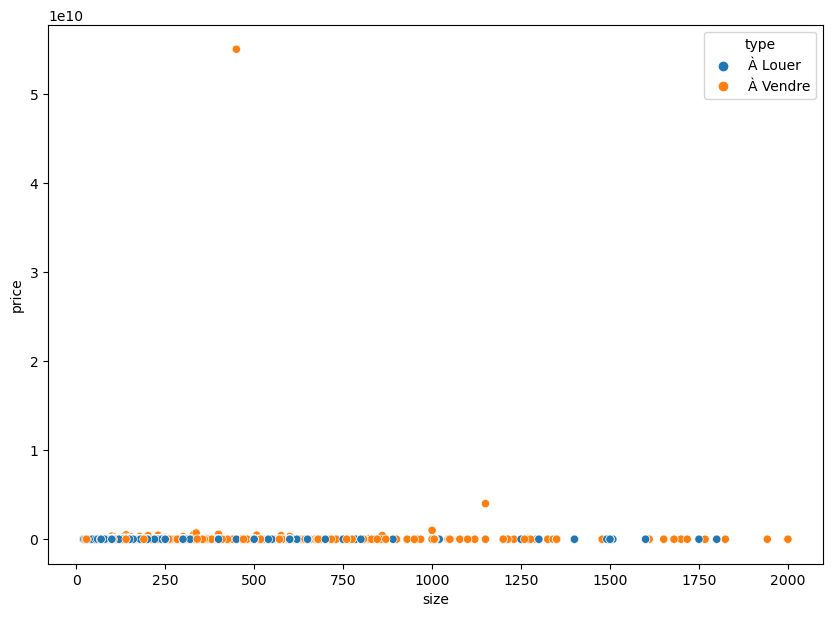

In [21]:
#Scatter plot price against the size, with the type as a hue
plt.figure(figsize=(10, 7))
sns.scatterplot(data = df , x="size", y="price", hue="type")

<AxesSubplot:xlabel='size', ylabel='log_price'>

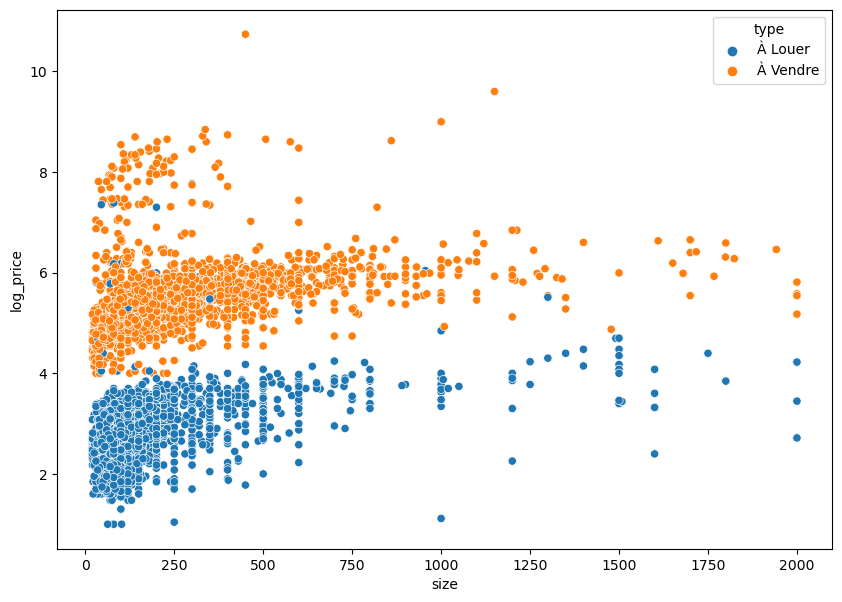

In [22]:
#Scatter plot price (actually we will use logprice in this case) against the size, with the type as a hue
plt.figure(figsize=(10, 7))
sns.scatterplot(data = df , x="size", y="log_price", hue="type")

In [23]:
df = df.dropna(thresh = 9)

In [24]:
dfVendre = df[df.type == 'À Vendre']
dfLouer = df[df.type == 'À Louer']

In [25]:
dfVendre.shape

(3675, 9)

<AxesSubplot:xlabel='size', ylabel='log_price'>

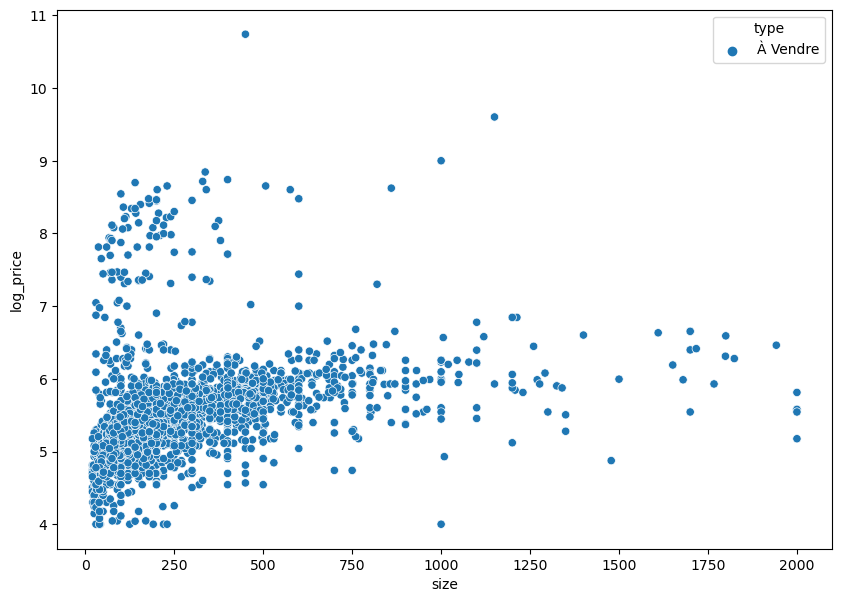

In [26]:
#Scatter plot price against the size of the proprities for sale , with the type as a hue
plt.figure(figsize=(10, 7))
sns.scatterplot(data = dfVendre , x="size", y="log_price", hue="type")

In [27]:
#A Z-score is a numerical measurement that describes a value's relationship to the mean of a group of values. 
#Z-score is measured in terms of standard deviations from the mean. 
#If a Z-score is 0, it indicates that the data point's score is identical to the mean score. 
#A Z-score of 1.0 would indicate a value that is one standard deviation from the mean. 
#Z-scores may be positive or negative, with a positive value indicating the score is above the mean and a negative score indicating it is below the mean.
z1 = np.abs(stats.zscore(dfVendre.log_price))
z2 = np.abs(stats.zscore(dfLouer.log_price))

In [28]:
threshold = 3
print(np.where(z1 > threshold))

(array([ 128,  163,  277,  469,  473,  487,  491,  557,  578,  595,  603,
        612,  664,  699,  737,  986,  987, 1010, 1064, 1076, 1091, 1102,
       1107, 1116, 1121, 1152, 1162, 1166, 1179, 1274, 1303, 1308, 1326,
       1329, 1339, 1361, 1394, 1407, 1422, 1431, 1446, 1466, 1493, 1509,
       1516, 1566, 1595, 1613, 1628, 1646, 1656, 1669, 1675, 1686, 1728,
       1759, 1775, 1782, 1789, 1791, 1859, 1968, 1976, 2174, 2275, 2492,
       2503, 2521, 2574, 2858, 2947, 2976, 3024, 3107, 3148, 3184, 3230,
       3244, 3320, 3400, 3443, 3554, 3622, 3672], dtype=int64),)


In [29]:
dfVendre_O  = dfVendre[(z1 < 2)]
dfLouer_O  = dfLouer[(z2 < 2)]
print(dfVendre_O.shape)
print(dfLouer_O.shape)


(3531, 9)
(4116, 9)


<AxesSubplot:xlabel='size', ylabel='price'>

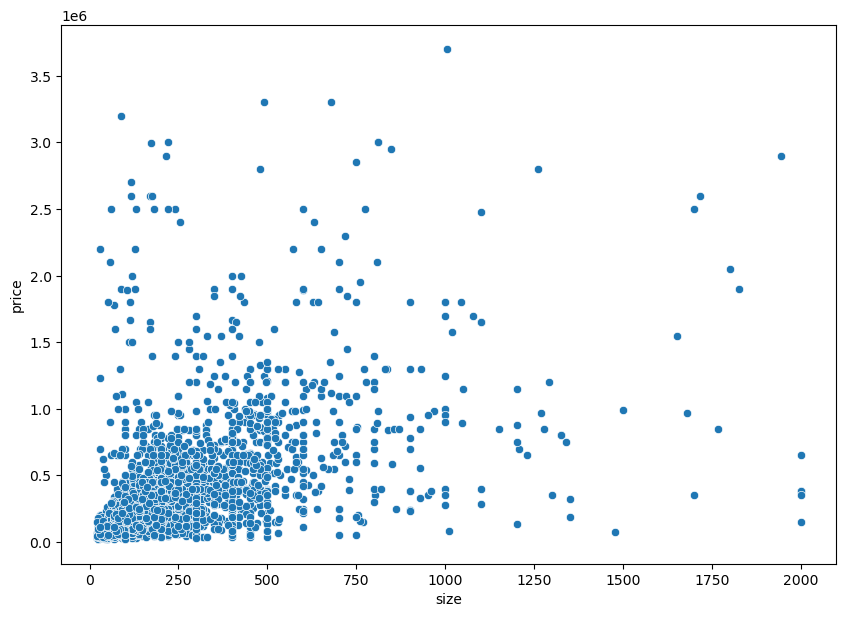

In [30]:
#Scatter plot price against the size, with the type as a hue
plt.figure(figsize=(10, 7))
sns.scatterplot(data = dfVendre_O , x="size", y="price")

<AxesSubplot:xlabel='size', ylabel='price'>

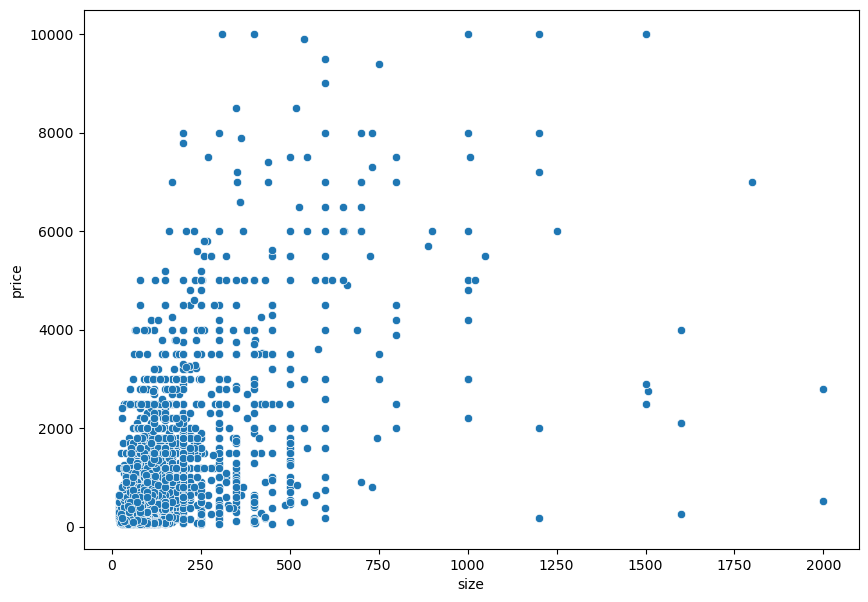

In [31]:
#Scatter plot price against the size, with the type as a hue
plt.figure(figsize=(10, 7))
sns.scatterplot(data = dfLouer_O , x="size", y="price")

In [32]:
df_New = pd.concat([dfVendre_O,dfLouer_O])

<AxesSubplot:xlabel='size', ylabel='log_price'>

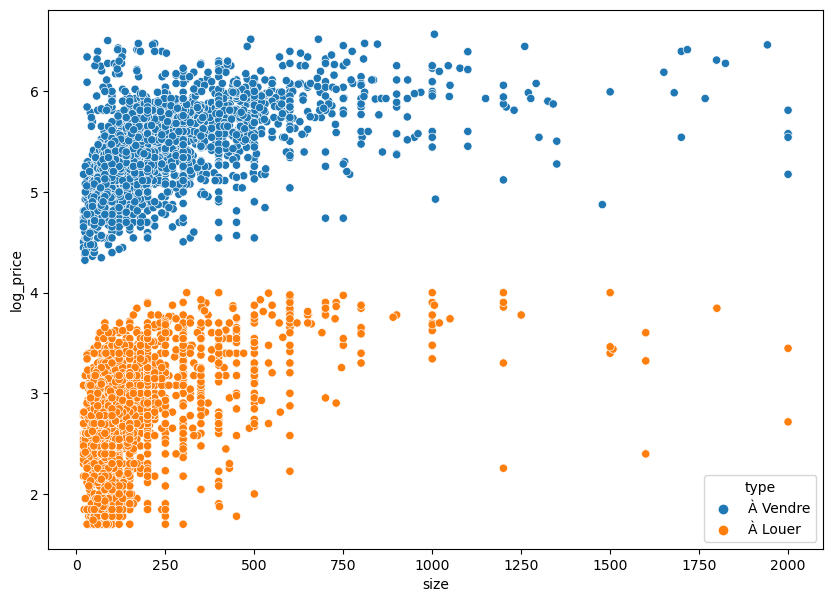

In [33]:
#Scatter plot price against the size, with the type as a hue
plt.figure(figsize=(10, 7))
sns.scatterplot(data = df_New , x="size", y="log_price", hue="type")

In [34]:
X = df_New.drop(['price','log_price','region'],axis = 1)
y = df_New.log_price

In [96]:
X

,category,room_count,bathroom_count,size,type,city
4,Appartements,2.0,2.0,113.0,À Vendre,Ariana
10,Maisons et Villas,4.0,2.0,1208.0,À Vendre,Ariana
14,Maisons et Villas,2.0,1.0,150.0,À Vendre,Ariana
18,Appartements,2.0,1.0,80.0,À Vendre,Ariana
19,"Magasins, Commerces et Locaux industriels",1.0,1.0,20.0,À Vendre,Ariana
...,...,...,...,...,...,...
12735,Appartements,2.0,1.0,70.0,À Louer,Tunis
12737,"Magasins, Commerces et Locaux industriels",1.0,1.0,300.0,À Louer,Tunis
12738,Appartements,1.0,1.0,60.0,À Louer,Tunis
12744,Appartements,1.0,1.0,100.0,À Louer,Tunis


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [37]:
from sklearn.preprocessing import OrdinalEncoder

In [38]:
Cat_Col = ['category','city','type']
Num_Col = ['room_count','bathroom_count' , 'size']
oe= OrdinalEncoder()

In [39]:
oe.fit_transform(df_New[Cat_Col])

array([[ 0.,  0.,  1.],
       [ 5.,  0.,  1.],
       [ 5.,  0.,  1.],
       ...,
       [ 0., 22.,  0.],
       [ 0., 22.,  0.],
       [ 5., 22.,  0.]])

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [41]:
sc.fit_transform(dfVendre[Num_Col])

array([[-0.67658725,  0.48902265, -0.48887868],
       [ 0.3862288 ,  0.48902265,  4.38201204],
       [-0.67658725, -0.64055512, -0.32429151],
       ...,
       [ 0.91763683,  1.61860042,  0.52088588],
       [-0.14517923, -0.64055512,  2.38917273],
       [-0.14517923, -0.64055512, -0.14635943]])

In [42]:
from sklearn.compose import ColumnTransformer
Pipeline = ColumnTransformer([
    ("num", StandardScaler(), Num_Col),
    ('cat', OrdinalEncoder(),Cat_Col)
])

In [43]:
x_train  = Pipeline.fit_transform(x_train)

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [45]:
Grid_par = [
    {'n_estimators' : [5,10,20,30,50,100] , 'max_features' : [2,3,4]},
    {'bootstrap': [False], 'n_estimators' : [5,10,20,30,50,100] , 'max_features' : [2,3,4]},
    {'n_estimators' : [5,10,20,30,50,100] , 'max_features' : [2,3,4],'max_depth' : [10,20,30]},
    {'bootstrap': [False], 'n_estimators' : [5,10,20,30,50,100] , 'max_features' : [2,3,4],'max_depth' : [10,20,30]}
            ]

model = RandomForestRegressor()

In [46]:
GridSearch = GridSearchCV(estimator= model , param_grid=Grid_par, cv = 5,
                         scoring='neg_mean_absolute_error', return_train_score=True)

In [47]:
GridSearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 3, 4],
                          'n_estimators': [5, 10, 20, 30, 50, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [5, 10, 20, 30, 50, 100]},
                         {'max_depth': [10, 20, 30], 'max_features': [2, 3, 4],
                          'n_estimators': [5, 10, 20, 30, 50, 100]},
                         {'bootstrap': [False], 'max_depth': [10, 20, 30],
                          'max_features': [2, 3, 4],
                          'n_estimators': [5, 10, 20, 30, 50, 100]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [48]:
results = GridSearch.cv_results_

In [49]:
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print (np.sqrt(-mean_score),params)

0.4696800411757829 {'max_features': 2, 'n_estimators': 5}
0.4670824980088212 {'max_features': 2, 'n_estimators': 10}
0.45984162805564904 {'max_features': 2, 'n_estimators': 20}
0.4592363217944774 {'max_features': 2, 'n_estimators': 30}
0.45668146565887 {'max_features': 2, 'n_estimators': 50}
0.45567807600035304 {'max_features': 2, 'n_estimators': 100}
0.4679974961860588 {'max_features': 3, 'n_estimators': 5}
0.461825599396708 {'max_features': 3, 'n_estimators': 10}
0.45885962184110285 {'max_features': 3, 'n_estimators': 20}
0.4570586686020069 {'max_features': 3, 'n_estimators': 30}
0.45671386219527094 {'max_features': 3, 'n_estimators': 50}
0.4554930095164867 {'max_features': 3, 'n_estimators': 100}
0.46923985879294333 {'max_features': 4, 'n_estimators': 5}
0.4601920024526411 {'max_features': 4, 'n_estimators': 10}
0.4589925512947409 {'max_features': 4, 'n_estimators': 20}
0.45771280758120664 {'max_features': 4, 'n_estimators': 30}
0.4567693695236702 {'max_features': 4, 'n_estimators':

In [51]:
GridSearch.best_estimator_

RandomForestRegressor(max_depth=10, max_features=3, n_estimators=50)

In [52]:
GridSearch.best_estimator_.feature_importances_

array([0.01568148, 0.01839505, 0.06485285, 0.01738882, 0.00914869,
       0.87453311])

In [55]:
FinalModel = GridSearch.best_estimator_

In [71]:
x_test  = Pipeline.transform(x_test)

In [101]:
x_test

array([[ 1.90387611e+00,  7.18797347e-01,  1.04964107e+00,
         5.00000000e+00,  2.20000000e+01,  1.00000000e+00],
       [ 1.05727346e-01, -5.30317247e-01, -2.58514884e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.09303850e+00,  1.96791194e+00, -1.53862408e-01,
         4.00000000e+00,  2.20000000e+01,  1.00000000e+00],
       ...,
       [-4.93655577e-01, -5.30317247e-01, -2.58514884e-01,
         5.00000000e+00,  6.00000000e+00,  1.00000000e+00],
       [ 1.05727346e-01,  7.18797347e-01, -4.15493598e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.05727346e-01,  7.18797347e-01,  3.11630677e-03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [63]:
preds = FinalModel.predict(x_test)

In [64]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [65]:
(mean_absolute_error(y_test, preds))**0.5

0.43037187136268057

In [66]:
r2_score(y_test, preds)

0.9613143228221831

In [67]:
normal_preds = 10 ** preds

In [68]:
pd.DataFrame(normal_preds).to_csv("normal_preds.csv")

In [52]:
import pickle 

In [56]:
# Make pickle file of our model
pickle.dump(FinalModel, open("model.pkl", "wb"))

In [87]:
def predict(L):
    float_features=Pipeline.fit_transform(L)
    prediction = FinalModel.predict(float_features)
    return prediction

In [1]:
# initialize list of lists
data = [["Maisons et Villas",6.0,2.0,500.0,"À Vendre","Tunis"],["Appartements",2.0,1.0,500.0,"À louer","Sfax"]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=["category","room_count","bathroom_count","size","type","city"])

NameError: name 'pd' is not defined

In [99]:
float_features=Pipeline.fit_transform(df)

In [100]:
float_features

array([[0., 0., 0., 0., 0., 0.]])

In [89]:
pred=predict(df)

In [91]:
print(10 **pred)

[797.94118817]
